In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
data = pd.read_csv('Netflix.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [ ]:
data.shape

(1009, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Exploratoey Data Analysis

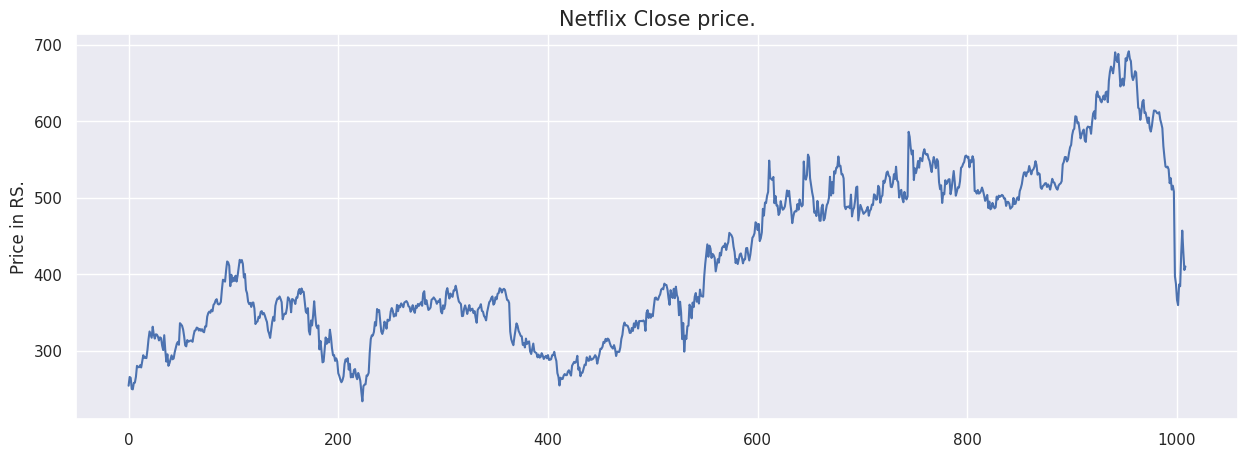

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('Netflix Close price.', fontsize=15)
plt.ylabel('Price in RS.')
plt.show()

Distribution Plot

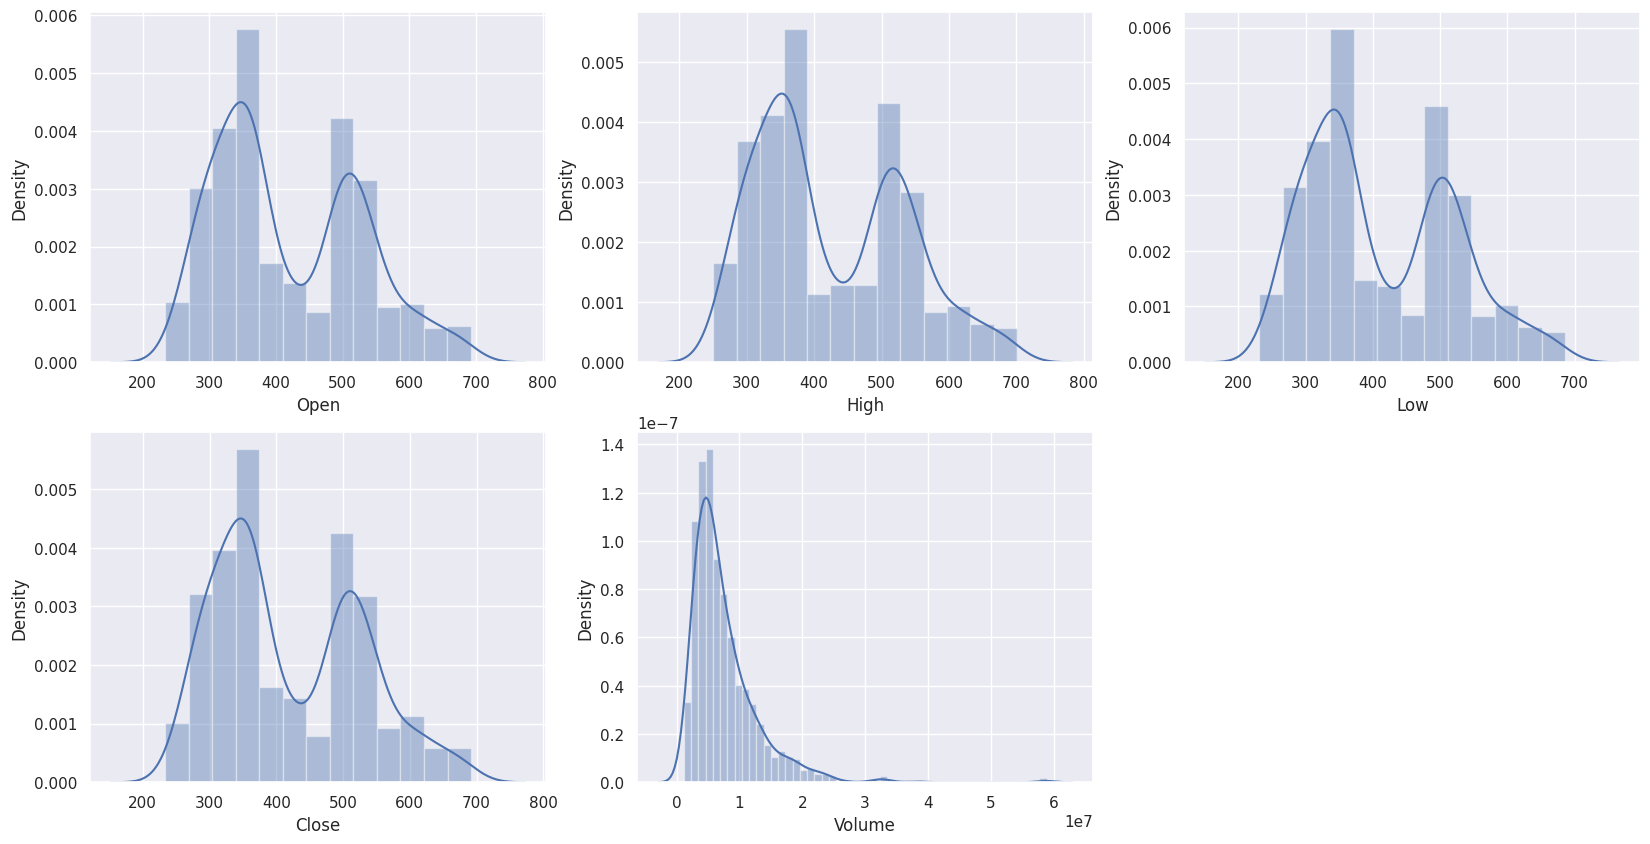

In [ ]:
features = ['Open','High','Low','Close','Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(data[col])
plt.show()

Histogram

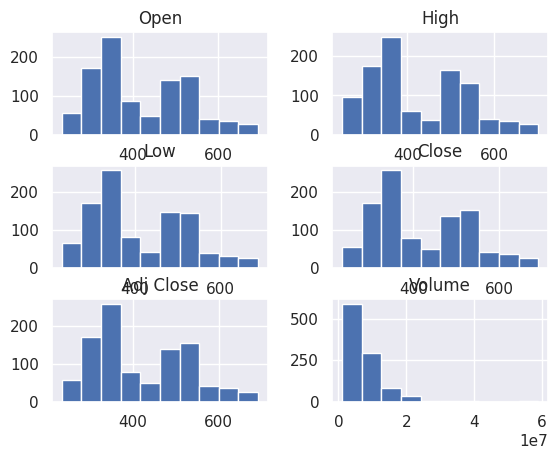

In [ ]:
sns.set(style="darkgrid")
data.hist()
plt.show()

Feature Engineering

In [ ]:
splitted = data['Date'].str.split('-',expand=True)

data['day'] = splitted[2].astype('int')
data['month'] = splitted[1].astype('int')
data['year'] = splitted[0].astype('int')

data['is_quarter_end'] = np.where(data['month']%3==0,1,0)

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,0


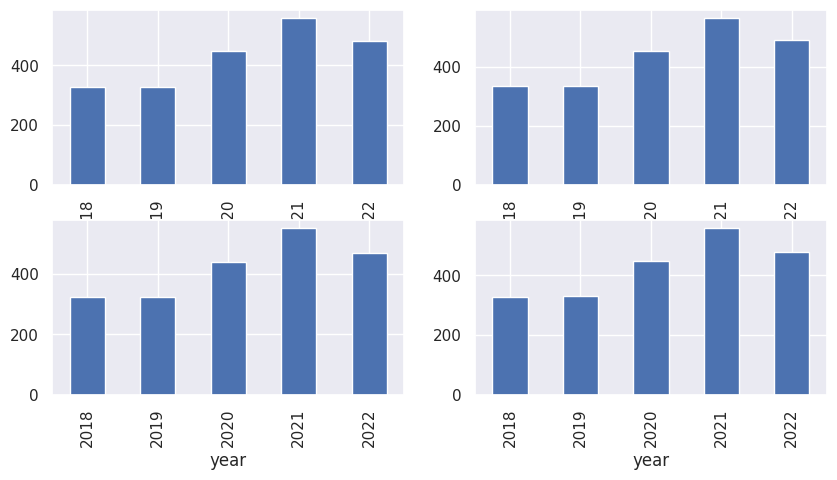

In [ ]:
data_grouped = data.groupby('year').mean()
plt.subplots(figsize=(10,5))

for i, col in enumerate(['Open','High','Low','Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
data.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,418.681368,424.889821,412.112068,418.699791,418.699791,7.951664e+06,15.715774,6.087798,2019.622024
1,419.814037,426.179910,412.896440,419.600831,419.600831,6.810988e+06,15.721068,7.442136,2019.543027


In [ ]:
data['open-close']  = data['Open'] - data['Close']
data['low-high']  = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

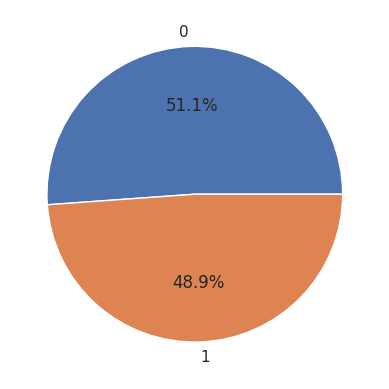

In [ ]:
plt.pie(data['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [ ]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838,-0.014462,0.130646,0.809151,0.004924,0.068445,-0.255225,-0.026456
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699,-0.015013,0.129469,0.810559,0.005571,0.029224,-0.282796,-0.028563
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116,-0.013412,0.131444,0.809264,0.003441,0.028096,-0.224804,-0.025292
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,-0.014870,0.129959,0.810160,0.003926,-0.011371,-0.253771,-0.031230
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,-0.014870,0.129959,0.810160,0.003926,-0.011371,-0.253771,-0.031230
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000,0.090775,-0.115963,-0.401308,-0.098481,-0.042850,-0.401047,-0.080255
day,-0.014462,-0.015013,-0.013412,-0.014870,-0.014870,0.090775,1.000000,0.006903,-0.015602,0.000285,0.004689,0.029448,0.022589
month,0.130646,0.129469,0.131444,0.129959,0.129959,-0.115963,0.006903,1.000000,-0.120315,0.186416,0.012333,-0.001272,0.022733
year,0.809151,0.810559,0.809264,0.810160,0.810160,-0.401308,-0.015602,-0.120315,1.000000,-0.032246,0.010510,-0.226627,0.006264
is_quarter_end,0.004924,0.005571,0.003441,0.003926,0.003926,-0.098481,0.000285,0.186416,-0.032246,1.000000,0.012621,-0.035511,0.032197


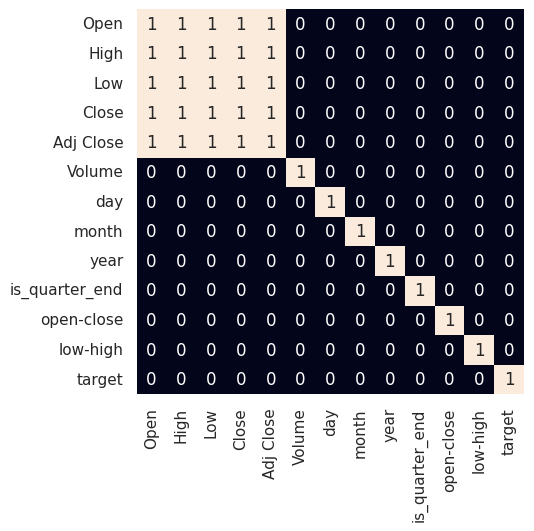

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr()>0.9,annot=True,cbar=False)
plt.show()

Split The Data Into Training & Testing Datasets

In [ ]:
new_data = data.dropna(axis = 0, how ='any')

In [ ]:
new_data['open-close'] = new_data['open-close'].astype(int)
new_data['low-high'] = new_data['low-high'].astype(int)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1009 non-null   object 
 1   Open            1009 non-null   float64
 2   High            1009 non-null   float64
 3   Low             1009 non-null   float64
 4   Close           1009 non-null   float64
 5   Adj Close       1009 non-null   float64
 6   Volume          1009 non-null   int64  
 7   day             1009 non-null   int64  
 8   month           1009 non-null   int64  
 9   year            1009 non-null   int64  
 10  is_quarter_end  1009 non-null   int64  
 11  open-close      1009 non-null   int64  
 12  low-high        1009 non-null   int64  
 13  target          1009 non-null   int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 110.5+ KB


In [ ]:
features = new_data[['open-close', 'low-high', 'is_quarter_end']]
target = new_data['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_test.shape)

(908, 3) (101, 3)


In [ ]:
Y_train[:5]

878    0
541    0
27     0
530    1
781    1
Name: target, dtype: int64

Model Training (Logistic Regression)

In [ ]:
models = [LogisticRegression(), SVC( kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Testing Accuracy : ', metrics.roc_auc_score( Y_test, models[i].predict_proba(X_test)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5391412116351972
Testing Accuracy :  0.5934242181234964

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5333090325873004
Testing Accuracy :  0.49238171611868486

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accur